In [1]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [13]:
engine.execute("select * from Measurement1 LIMIT 100").fetchall()

[(0, '2010-01-01', 'USC00519397', 0.08, 65),
 (1, '2010-01-02', 'USC00519397', 0.0, 63),
 (2, '2010-01-03', 'USC00519397', 0.0, 74),
 (3, '2010-01-04', 'USC00519397', 0.0, 76),
 (4, '2010-01-07', 'USC00519397', 0.06, 70),
 (5, '2010-01-08', 'USC00519397', 0.0, 64),
 (6, '2010-01-09', 'USC00519397', 0.0, 68),
 (7, '2010-01-10', 'USC00519397', 0.0, 73),
 (8, '2010-01-11', 'USC00519397', 0.01, 64),
 (9, '2010-01-12', 'USC00519397', 0.0, 61),
 (10, '2010-01-14', 'USC00519397', 0.0, 66),
 (11, '2010-01-15', 'USC00519397', 0.0, 65),
 (12, '2010-01-16', 'USC00519397', 0.0, 68),
 (13, '2010-01-17', 'USC00519397', 0.0, 64),
 (14, '2010-01-18', 'USC00519397', 0.0, 72),
 (15, '2010-01-19', 'USC00519397', 0.0, 66),
 (16, '2010-01-20', 'USC00519397', 0.0, 66),
 (17, '2010-01-21', 'USC00519397', 0.0, 69),
 (18, '2010-01-22', 'USC00519397', 0.0, 67),
 (19, '2010-01-23', 'USC00519397', 0.0, 67),
 (20, '2010-01-24', 'USC00519397', 0.01, 71),
 (21, '2010-01-25', 'USC00519397', 0.0, 67),
 (22, '2010-01-2

In [8]:
engine.execute("select * from Station3 LIMIT 25").fetchall()

[(0, 'USC00519397', 21.2716, -157.8168, 3.0),
 (1, 'USC00513117', 21.4234, -157.8015, 14.6),
 (2, 'USC00514830', 21.5213, -157.8374, 7.0),
 (3, 'USC00517948', 21.3934, -157.9751, 11.9),
 (4, 'USC00518838', 21.4992, -158.0111, 306.6),
 (5, 'USC00519523', 21.33556, -157.71139, 19.5),
 (6, 'USC00519281', 21.45167, -157.84888999999995, 32.9),
 (7, 'USC00511918', 21.3152, -157.9992, 0.9),
 (8, 'USC00516128', 21.3331, -157.8025, 152.4)]

In [49]:
inspector = inspect(engine)
columns = inspector.get_columns('Station3')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement1')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
date TEXT
station TEXT
prcp FLOAT
tobs INTEGER


In [7]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.Measurement1
Station = Base.classes.Station3

session = Session(engine)

In [17]:
sel = [Measurement.date,  
       Measurement.prcp]
precip_data = session.query(*sel).\
    filter(func.strftime("%Y", Measurement.date) == "2017").\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
### END SOLUTION
precip_data

[('2017-01-01', 0.03),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.47),
 ('2017-01-06', 0.1),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.03),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.01),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.07),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.08),
 ('2017-01-22', 0.72),
 ('2017-01-23', 0.85),
 ('2017-01-24', 1.85),
 ('2017-01-25', 2.64),
 ('2017-01-26', 0.1),
 ('2017-01-27', 0.03),
 ('2017-01-28', 0.0),
 ('2017-01-29', 0.55),
 ('2017-01-30', 0.0),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', 0.0),
 ('2017-02-05', 0.0),
 ('2017-02-06', 0.0),
 ('2017-02-07', 1.79),
 ('2017-02-08', 0.0),
 ('2017-02-09', 0.0),
 ('2017-02-10', 0.0),
 ('2017-02-11', 0.73),
 ('2017-02-12', 1.83),
 ('2017-02-13', 0.0),
 ('2017-02-14', 0

<IPython.core.display.Javascript object>


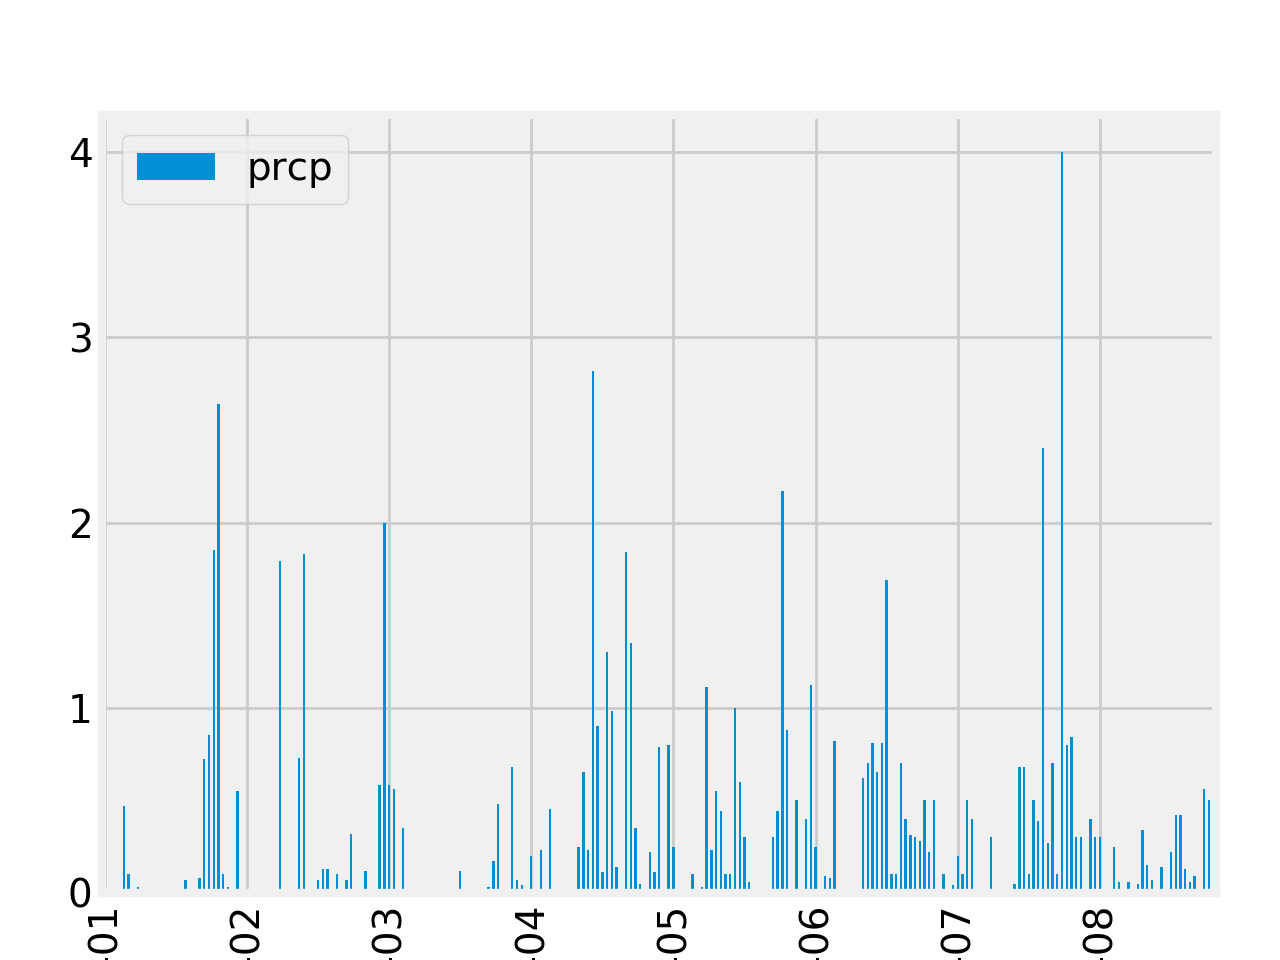

In [47]:
# Plot the Results in a Matplotlib bar chart

df = pd.DataFrame(precip_data, columns=['date','prcp'])

pd.to_datetime(df['date'], format='%Y%m%d', errors='ignore')
df.set_index('date', inplace=True)
df.plot.bar()   # interpret the x-axis values as dates

plt.locator_params(nbins=8)
plt.show()


In [48]:
#Describe data
df.describe()

,prcp
count,235.000000
mean,0.305660
std,0.540142
min,0.000000
25%,0.000000
50%,0.080000
75%,0.410000
max,4.000000


In [67]:
#Total Stations
sel = [func.count(Station.station)]
Total_stations = session.query(*sel).all()
    #group_by(Station.station).all()
    #order_by(Station.station).all()

print(Total_stations)

[(9,)]


In [84]:
#Most Active Stations
from sqlalchemy import desc
sel = [Measurement.station, func.count(Measurement.station)]
Total_stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).all()

print(Total_stations)

[('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]


In [85]:
#Top Station
from sqlalchemy import desc
sel = [Measurement.station, func.count(Measurement.station)]
Total_stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).\
    limit(1).all()

print(Total_stations)

[('USC00519281', 2772)]


In [89]:
#2017 observations
sel = [Measurement.station,  
       func.count(Measurement.station)]
precip_data_total = session.query(*sel).\
    filter(func.strftime("%Y", Measurement.date) == "2017").\
    group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).\
    limit(1).all()
    
print(precip_data_total)


[('USC00519397', 230)]


In [ ]:
df = pd.DataFrame(precip_data, columns=['date','prcp'])